In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb


In [5]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
train_data = pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = pad_sequences(test_data, value=0, padding='post', maxlen=256)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
import numpy as np

In [12]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 71ms/step - loss: 0.6918 - accuracy: 0.5869 - val_loss: 0.6898 - val_accuracy: 0.6837
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6861 - accuracy: 0.7325 - val_loss: 0.6820 - val_accuracy: 0.7283
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6741 - accuracy: 0.7321 - val_loss: 0.6674 - val_accuracy: 0.7448
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6525 - accuracy: 0.7689 - val_loss: 0.6414 - val_accuracy: 0.7666
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.6189 - accuracy: 0.7915 - val_loss: 0.6068 - val_accuracy: 0.7825
Epoch 6/20
30/30 [==============================] - 2s 70ms/step - loss: 0.5769 - accuracy: 0.8067 - val_loss: 0.5653 - val_accuracy: 0.8005
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5302 - accuracy: 0.8265 - val_loss: 0.5227 - val_accuracy: 0.8177
Epoch 8/20
30

In [16]:
results = model.evaluate(test_data, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3088 - accuracy: 0.8744
[0.30881792306900024, 0.8743600249290466]


Le modèle a une précision de 87,44% sur l'ensemble de données de test avec une perte de 0.3088. C'est un résultat assez bon pour un premier modèle, surtout en utilisant une architecture simple.

In [29]:
import matplotlib.pyplot as plt

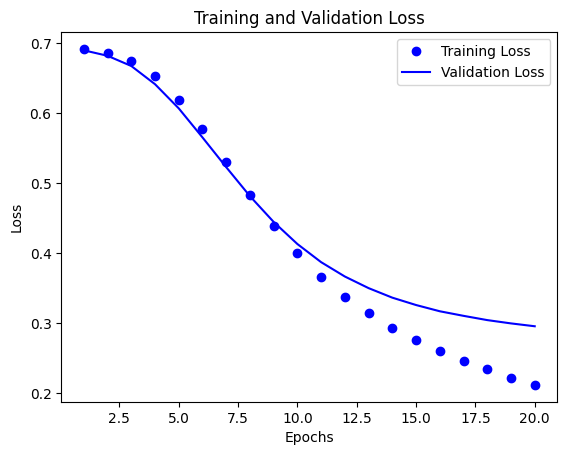

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()